### Packages utlisés

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams
import string
import spacy

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optionnel pour WordNet Lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Chargement des données 

In [11]:
articles_bitcoin = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_bitcoin.csv")
articles_bnb = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_bnb.csv")
articles_cardano = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_cardano .csv")
articles_dogecoin = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_dogecoin .csv")
articles_ethereum = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_ethereum.csv")
articles_polkadot = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_polkadot.csv")
articles_polygon = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_polygon .csv")
articles_sol = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_sol.csv")
articles_tether = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_tether .csv")
articles_xrp = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\articles_xrp.csv")
# articles_partiels = pd.read_csv("/Users/dimitriguift/Documents/PROJET_FINANCE/data/raw/articles_partiels.csv")

In [12]:
print(articles_bitcoin.shape,
      articles_bnb.shape,
      articles_cardano.shape,
      articles_dogecoin.shape,
      articles_ethereum.shape,
      articles_polkadot.shape,
      articles_polygon.shape,
      articles_sol.shape,
      articles_tether.shape,
      articles_xrp.shape)

(1021, 3) (524, 3) (857, 3) (1290, 3) (2873, 3) (153, 3) (368, 3) (4015, 3) (512, 3) (1409, 3)


#### Vérification des news sans date renseignée

In [13]:
# 🔹 Stocker toutes les DataFrames dans une liste
crypto_dfs = {
    "Bitcoin": articles_bitcoin,
    "BNB": articles_bnb,
    "Cardano": articles_cardano,
    "Dogecoin": articles_dogecoin,
    "Ethereum": articles_ethereum,
    "Polkadot": articles_polkadot,
    "Polygon": articles_polygon,
    "Solana": articles_sol,
    "Tether": articles_tether,
    "XRP": articles_xrp,
}

# 🔹 Vérifier les valeurs "Inconnu" dans la colonne "date"
inconnu_counts = {crypto: df["date"].eq("Inconnu").sum() for crypto, df in crypto_dfs.items()}

# 🔹 Affichage des résultats
for crypto, count in inconnu_counts.items():
    print(f"{crypto}: {count} lignes avec 'Inconnu'")

Bitcoin: 23 lignes avec 'Inconnu'
BNB: 13 lignes avec 'Inconnu'
Cardano: 8 lignes avec 'Inconnu'
Dogecoin: 13 lignes avec 'Inconnu'
Ethereum: 9 lignes avec 'Inconnu'
Polkadot: 8 lignes avec 'Inconnu'
Polygon: 6 lignes avec 'Inconnu'
Solana: 9 lignes avec 'Inconnu'
Tether: 13 lignes avec 'Inconnu'
XRP: 10 lignes avec 'Inconnu'


#### Fusion des bases de données sur les différentes cryptomonnaies

In [14]:
# 🔹 Liste contenant toutes les bases de données
dfs = [
    articles_bitcoin, articles_bnb, articles_cardano, articles_dogecoin, 
    articles_ethereum, articles_polkadot, articles_polygon, articles_sol, 
    articles_tether, articles_xrp
]

# 🔹 Fusionner toutes les bases de données en un seul DataFrame
df_crypto = pd.concat(dfs, ignore_index=True)

# 🔹 Vérification de la fusion
print(f"✅ Fusion réussie ! Nombre total de lignes : {df_crypto.shape[0]}")
print(f"✅ Aperçu des colonnes du DataFrame fusionné : {df_crypto.columns}")

✅ Fusion réussie ! Nombre total de lignes : 13022
✅ Aperçu des colonnes du DataFrame fusionné : Index(['title', 'date', 'description'], dtype='object')


In [15]:
df_crypto.tail(5)

,title,date,description
13017,Mineable Coin in Cryptocurrency,Inconnu,Cryptocurrency mining is a novel concept in mo...
13018,CryptoWallet,Inconnu,Ready to enter the world of crypto banking? Cr...
13019,crypto prices today,Inconnu,To stay updated with the latest developments i...
13020,BC.Game: A Crypto Gaming Platform,Inconnu,BC.Game offers gamers an exciting way of earni...
13021,KuCoin: A Spot and Derivatives Crypto Exchange,Inconnu,KuCoin is a major cryptocurrency exchange that...


#### Suppresion de certaines lignes (valeurs manquantes) 

In [16]:
import pandas as pd

def clean_dataframe(df):
    # 🔹 Supprimer les lignes où "date" contient "Inconnu" (gère les NaN)
    df = df[df["date"].astype(str).str.lower() != "inconnu"]

    # 🔹 Supprimer les lignes où "description" est vide ou NaN
    df = df.dropna(subset=["description"])  # Supprime les NaN
    df = df[df["description"].str.strip() != ""]  # Supprime les descriptions vides

    return df.reset_index(drop=True)  # Réinitialiser l'index après suppression

# 📌 Appliquer la fonction au DataFrame
df_crypto = clean_dataframe(df_crypto)

In [17]:
clean_dataframe(df_crypto)

,title,date,description
0,Bitcoin price sets new all-time high at $109k ...,2025-01-20 08:36:00,Bitcoin reached a new all-time high on Monday ...
1,Bitcoin ETF weekly inflows surged 475% ahead o...,2025-01-20 06:52:00,Inflows into U.S. spot Bitcoin exchange-traded...
2,Survey reveals over 50% of Americans sell gold...,2025-01-19 23:44:00,Most people who read about cryptocurrencies kn...
3,Saylor expects ‘things will be different’ on I...,2025-01-19 21:13:00,MicroStrategy’s Michael Saylor has hinted at a...
4,"Qubetics, Bitcoin Cash, and Ethereum are shapi...",2025-01-19 19:32:00,"Qubetics disrupts blockchain usability, joinin..."
...,...,...,...
12905,"SATS, Aave, Monero, and ORDI soar over 10% aft...",2024-07-26 08:56:00,"Altcoins SATS, Aave, Monero, and ORDI have all..."
12906,Trump campaign raises over $4m in crypto,2024-07-25 16:51:00,Former President Donald Trump has successfully...
12907,Analysts have picked this memecoin as the top ...,2024-07-25 15:36:00,Avalanche and LayerZero surge: ZRO hits new AT...
12908,These Altcoins Could Explode in 2024: Ethereum...,2024-07-25 14:47:00,"Ethereum (ETH), Ripple (XRP), and Avalanche (A..."


#### Création de la colonne "cryptocurrency"

In [18]:
# Dictionnaire de correspondance pour les cryptos (normalisation)
crypto_mapping = {
    "Ethereum": "ETH", "ETH": "ETH",
    "Bitcoin": "BTC", "BTC": "BTC",
    "Solana": "SOL", "SOL": "SOL",
    "Cardano": "ADA", "ADA": "ADA",
    "XRP": "XRP",
    "Dogecoin": "DOGE", "DOGE": "DOGE",
    "BNB": "BNB", "Binance Coin": "BNB",
    "Polkadot": "DOT", "DOT": "DOT",
    "Polygon": "MATIC", "MATIC": "MATIC",
    "Tether": "USDT", "USDT": "USDT"
}

# Fonction pour détecter les cryptos dans un texte
def find_primary_crypto(text):
    if pd.isna(text):  # Gérer les valeurs NaN
        return None
    
    text = str(text)  # S'assurer que la valeur est bien une string

    for key, value in crypto_mapping.items():
        pattern = rf'\b{re.escape(key)}\b'  # Recherche de mot exact
        if re.search(pattern, text, re.IGNORECASE):  # Ignore majuscules/minuscules
            return value  # Retourne la première crypto trouvée
    
    return None  # Aucune crypto trouvée

# Fonction principale : chercher d'abord dans description, puis titre si nécessaire
def detect_crypto(row):
    primary_crypto = find_primary_crypto(row["description"])
    
    if primary_crypto is None:  # Si aucune crypto trouvée dans la description, on regarde dans le titre
        primary_crypto = find_primary_crypto(row["title"])
    
    return primary_crypto

In [19]:
# Appliquer la fonction sur chaque ligne du DataFrame
df_crypto["cryptocurrency"] = df_crypto.apply(detect_crypto, axis=1)

In [20]:
# Affichage du DataFrame final
df_crypto.head(5)

,title,date,description,cryptocurrency
0,Bitcoin price sets new all-time high at $109k ...,2025-01-20 08:36:00,Bitcoin reached a new all-time high on Monday ...,BTC
1,Bitcoin ETF weekly inflows surged 475% ahead o...,2025-01-20 06:52:00,Inflows into U.S. spot Bitcoin exchange-traded...,BTC
2,Survey reveals over 50% of Americans sell gold...,2025-01-19 23:44:00,Most people who read about cryptocurrencies kn...,BTC
3,Saylor expects ‘things will be different’ on I...,2025-01-19 21:13:00,MicroStrategy’s Michael Saylor has hinted at a...,BTC
4,"Qubetics, Bitcoin Cash, and Ethereum are shapi...",2025-01-19 19:32:00,"Qubetics disrupts blockchain usability, joinin...",ETH


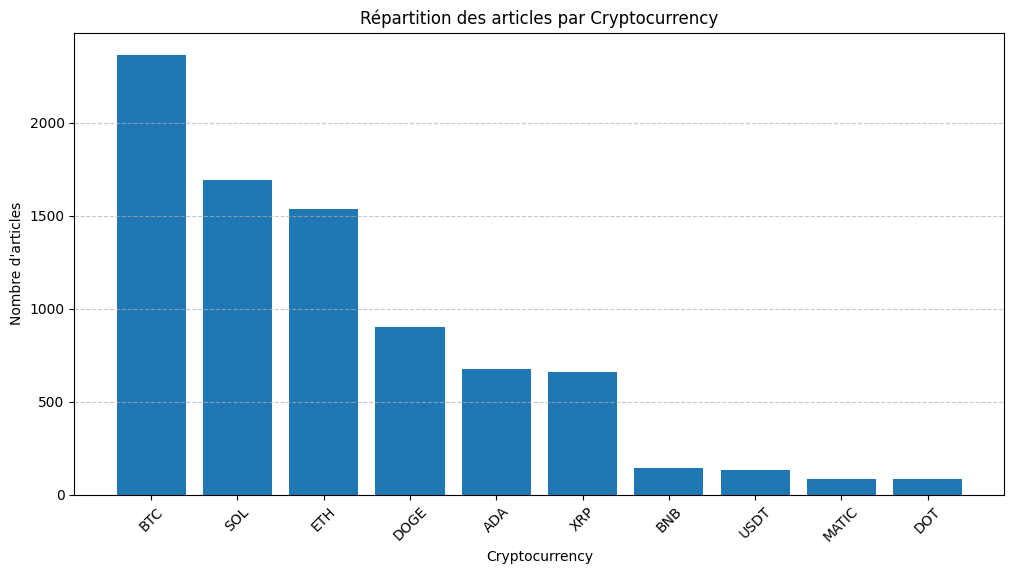

In [21]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences de chaque crypto
crypto_counts = df_crypto["cryptocurrency"].value_counts()

# Créer un diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(crypto_counts.index, crypto_counts.values)
plt.xlabel("Cryptocurrency")
plt.ylabel("Nombre d'articles")
plt.title("Répartition des articles par Cryptocurrency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

### Preprocessing des données textuelles

In [23]:
# Charger le modèle Spacy pour l'anglais
nlp = spacy.load("en_core_web_sm")

# Liste des mots à exclure (stopwords personnalisés)
custom_stop_words = [
    'http', 'https', 'www', 'com', 'crypto', 'cryptocurrency', 'bitcoin', 'btc',
    'ethereum', 'eth', 'blockchain', 'today', 'tonight', 'actually', 'lol', 
    'day', 'hour', 'minute', 'sec', 'talk', 'price', 'market', 'coin'
]

# Fonction de preprocessing
def crypto_text_preprocessing(text):
    # 1. Suppression des URL
    text = re.sub(r'http\S+|www.\S+', '', text)
    # 2. Suppression des mentions et hashtags (Twitter style)
    text = re.sub(r'@\w+|#\w+', '', text)
    # 3. Suppression des balises HTML
    text = re.sub(r'<.*?>', '', text)
    # 4. Conservation uniquement des mots alphanumériques
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    # 5. Conversion en minuscules
    text = text.lower()
    
    # 6. Tokenisation, suppression des stopwords et lemmatisation via Spacy
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop                  # Exclure les stopwords Spacy
        and token.text not in custom_stop_words  # Exclure les stopwords personnalisés
        and len(token.text) > 2               # Exclure les mots de moins de 3 caractères
        and token.is_alpha                   # Conserver uniquement les mots alphanumériques
    ]
    
    # 7. Génération de bigrammes (sans répétition des mots)
    bigram_list = [
        '_'.join(bigram) for bigram in bigrams(tokens)
        if bigram[0] not in tokens or bigram[1] not in tokens  # Vérifie que les mots ne sont pas déjà présents
    ]
    
    # 8. Reconstruction du texte nettoyé (ajout uniquement de bigrammes non répétitifs)
    text_cleaned = ' '.join(tokens + bigram_list)
    
    return text_cleaned


### Application de la fonction de preprocessing 

In [24]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "description"
df_crypto = df_crypto.dropna(subset=["description"])

In [25]:
df_crypto["cleaned_description"] = df_crypto["description"].apply(crypto_text_preprocessing)

In [26]:
df_crypto[["description", "cleaned_description"]].head()

,description,cleaned_description
0,Bitcoin reached a new all-time high on Monday ...,reach new alltime high monday excitement grow ...
1,Inflows into U.S. spot Bitcoin exchange-traded...,inflow spot exchangetrade fund surge week fuel...
2,Most people who read about cryptocurrencies kn...,people read cryptocurrencie know characteristi...
3,MicroStrategy’s Michael Saylor has hinted at a...,microstrategys michael saylor hint acquisition...
4,"Qubetics disrupts blockchain usability, joinin...",qubetics disrupt usability join cash crypto wa...


In [27]:
df_crypto

,title,date,description,cryptocurrency,cleaned_description
0,Bitcoin price sets new all-time high at $109k ...,2025-01-20 08:36:00,Bitcoin reached a new all-time high on Monday ...,BTC,reach new alltime high monday excitement grow ...
1,Bitcoin ETF weekly inflows surged 475% ahead o...,2025-01-20 06:52:00,Inflows into U.S. spot Bitcoin exchange-traded...,BTC,inflow spot exchangetrade fund surge week fuel...
2,Survey reveals over 50% of Americans sell gold...,2025-01-19 23:44:00,Most people who read about cryptocurrencies kn...,BTC,people read cryptocurrencie know characteristi...
3,Saylor expects ‘things will be different’ on I...,2025-01-19 21:13:00,MicroStrategy’s Michael Saylor has hinted at a...,BTC,microstrategys michael saylor hint acquisition...
4,"Qubetics, Bitcoin Cash, and Ethereum are shapi...",2025-01-19 19:32:00,"Qubetics disrupts blockchain usability, joinin...",ETH,qubetics disrupt usability join cash crypto wa...
...,...,...,...,...,...
12905,"SATS, Aave, Monero, and ORDI soar over 10% aft...",2024-07-26 08:56:00,"Altcoins SATS, Aave, Monero, and ORDI have all...",BTC,altcoin sat aave monero ordi surge past rank g...
12906,Trump campaign raises over $4m in crypto,2024-07-25 16:51:00,Former President Donald Trump has successfully...,None,president donald trump successfully raise mill...
12907,Analysts have picked this memecoin as the top ...,2024-07-25 15:36:00,Avalanche and LayerZero surge: ZRO hits new AT...,None,avalanche layerzero surge zro hit new ath spik...
12908,These Altcoins Could Explode in 2024: Ethereum...,2024-07-25 14:47:00,"Ethereum (ETH), Ripple (XRP), and Avalanche (A...",ETH,ripple xrp avalanche avax set significant grow...


#### Modèle CryptoBERT

In [30]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
import torch 

#### Création du modèle

In [32]:
# Spécifier le modèle pré-entraîné CryptoBERT
model_name = "ElKulako/cryptobert"

# Charger le tokenizer pour convertir le texte brut en tokens
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

# Charger le modèle pré-entraîné pour la classification des sentiments (3 classes)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Configurer le pipeline combinant le modèle et le tokenizer
pipe = TextClassificationPipeline(
    model=model,           # Modèle CryptoBERT
    tokenizer=tokenizer,   # Tokenizer associé
    max_length=128,        # Limite de longueur des séquences
    truncation=True,       # Tronquer les séquences longues
    padding='max_length'   # Ajouter du padding pour uniformiser la longueur
)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


#### Classification des news selon le sentiment (positif, neutre, négatif)

In [112]:
def classify_sentiment(text):
    """
    Fonction pour classer le sentiment d'un texte à l'aide de CryptoBERT.
    """
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        # Si le texte est vide ou inexistant
        return {"label": "Unknown", "score": 0.0}
    
    # Appliquer le pipeline de classification
    prediction = pipe(text)[0]  # La première prédiction
    return {"label": prediction["label"], "score": prediction["score"]}

In [113]:
df_crypto["sentiment"] = df_crypto["cleaned_description"].apply(classify_sentiment)

# Extraire les labels et scores dans des colonnes séparées
df_crypto["sentiment_label"] = df_crypto["sentiment"].apply(lambda x: x["label"])
df_crypto["sentiment_score"] = df_crypto["sentiment"].apply(lambda x: x["score"])

In [114]:
df_crypto

,title,date,description,cryptocurrency,cleaned_description,sentiment,sentiment_label,sentiment_score
0,"Trump’s inauguration boosts crypto: Bitcoin, X...",2025-01-24 23:50:00,Trump’s inauguration led to a boost in crypto ...,BTC,trump inauguration lead boost price xrp rollbl...,"{'label': 'Bullish', 'score': 0.6635075807571411}",Bullish,0.663508
1,"ETH, Bitcoin trends diverge as RTX gains atten...",2025-01-24 21:10:00,"ETH and Bitcoin trends diverge as RTX, a uniqu...",ETH,trend diverge rtx unique project capture atten...,"{'label': 'Neutral', 'score': 0.5526217818260193}",Neutral,0.552622
2,"Spot Bitcoin ETFs are ‘quietly on fire’, exper...",2025-01-24 15:19:00,U.S. spot bitcoin exchange-traded funds have s...,BTC,spot exchangetrade fund start year strong note...,"{'label': 'Neutral', 'score': 0.713426947593689}",Neutral,0.713427
3,Medical device maker Semler Scientific seeks $...,2025-01-24 12:23:00,Semler Scientific seeks $75 million through a ...,BTC,semler scientific seek million private offerin...,"{'label': 'Neutral', 'score': 0.5196594595909119}",Neutral,0.519659
4,CryptoQuant CEO: China sold 194k Bitcoin from ...,2025-01-24 12:22:00,CryptoQuant CEO Ki Young Ju believes China’s a...,BTC,cryptoquant ceo young believe chinas authority...,"{'label': 'Neutral', 'score': 0.9426167011260986}",Neutral,0.942617
...,...,...,...,...,...,...,...,...
13100,QuarkChain price prediction: How far can it ra...,2024-07-30 19:51:00,"On July 28, the QKC token’s price increased fr...",None,july qkc tokens increase past week climb july ...,"{'label': 'Neutral', 'score': 0.500015377998352}",Neutral,0.500015
13101,Ripple CEO accuses SEC of ‘hypocrisy’ and conf...,2024-07-30 16:02:00,Ripple CEO Brad Garlinghouse sharply criticize...,SOL,ripple ceo brad garlinghouse sharply criticize...,"{'label': 'Neutral', 'score': 0.6856582760810852}",Neutral,0.685658
13102,Bitcoin dips below $67k as US moves seized BTC,2024-07-30 09:51:00,"Bitcoin, the leading cryptocurrency by market ...",BTC,lead cap pull sixweek high dipping mark tuesda...,"{'label': 'Neutral', 'score': 0.7490403056144714}",Neutral,0.749040
13103,"BNB, Pepe plunge from recent ATHs as analysts ...",2024-07-29 07:41:00,BNB and Pepe see declines amid market challeng...,BNB,bnb pepe decline amid challenge raboos presale...,"{'label': 'Neutral', 'score': 0.8757597208023071}",Neutral,0.875760


In [115]:
# Vérifier si la colonne sentiment_label contient les prédictions
if "sentiment_label" in df_crypto.columns:
    # Calculer les pourcentages pour chaque label
    sentiment_counts = df_crypto["sentiment_label"].value_counts(normalize=True) * 100
    
    # Convertir en DataFrame pour une meilleure présentation
    sentiment_percentages = sentiment_counts.reset_index()
    sentiment_percentages.columns = ["Sentiment", "Percentage"]
    
    # Afficher les pourcentages
    print(sentiment_percentages)
else:
    print("La colonne 'sentiment_label' est absente. Assurez-vous d'avoir appliqué la classification.")

  Sentiment  Percentage
0   Neutral   67.417016
1   Bullish   31.751240
2   Bearish    0.831744


#### Décomposer la date en deux nouvelles variables 



In [116]:
import pandas as pd

def split_datetime(df, date_column="date"):

    # Convertir en datetime (ignorer les erreurs pour éviter les problèmes avec "Inconnu")
    df[date_column] = pd.to_datetime(df[date_column], errors="coerce")

    # Création des nouvelles colonnes
    df["date_only"] = df[date_column].dt.date  # Extraire uniquement la date (format YYYY-MM-DD)
    df["time_only"] = df[date_column].dt.time  # Extraire uniquement l'heure (format HH:MM:SS)

    return df

In [117]:
df_crypto = split_datetime(df_crypto,date_column="date")

In [118]:
def encode_sentiment(df):
    """
    Ajoute une colonne 'sentiment_coded' avec des valeurs numériques basées sur 'sentiment_label'.
    - 'Bullish'  → +1
    - 'Neutral'  →  0
    - 'Bearish'  → -1
    """
    # 🔹 Définition du mapping
    sentiment_mapping = {"Bullish": 1, "Neutral": 0, "Bearish": -1}

    # 🔹 Création de la nouvelle colonne
    df["sentiment_coded"] = df["sentiment_label"].map(sentiment_mapping)

    return df

In [119]:
encode_sentiment(df_crypto)

,title,date,description,cryptocurrency,cleaned_description,sentiment,sentiment_label,sentiment_score,date_only,time_only,sentiment_coded
0,"Trump’s inauguration boosts crypto: Bitcoin, X...",2025-01-24 23:50:00,Trump’s inauguration led to a boost in crypto ...,BTC,trump inauguration lead boost price xrp rollbl...,"{'label': 'Bullish', 'score': 0.6635075807571411}",Bullish,0.663508,2025-01-24,23:50:00,1
1,"ETH, Bitcoin trends diverge as RTX gains atten...",2025-01-24 21:10:00,"ETH and Bitcoin trends diverge as RTX, a uniqu...",ETH,trend diverge rtx unique project capture atten...,"{'label': 'Neutral', 'score': 0.5526217818260193}",Neutral,0.552622,2025-01-24,21:10:00,0
2,"Spot Bitcoin ETFs are ‘quietly on fire’, exper...",2025-01-24 15:19:00,U.S. spot bitcoin exchange-traded funds have s...,BTC,spot exchangetrade fund start year strong note...,"{'label': 'Neutral', 'score': 0.713426947593689}",Neutral,0.713427,2025-01-24,15:19:00,0
3,Medical device maker Semler Scientific seeks $...,2025-01-24 12:23:00,Semler Scientific seeks $75 million through a ...,BTC,semler scientific seek million private offerin...,"{'label': 'Neutral', 'score': 0.5196594595909119}",Neutral,0.519659,2025-01-24,12:23:00,0
4,CryptoQuant CEO: China sold 194k Bitcoin from ...,2025-01-24 12:22:00,CryptoQuant CEO Ki Young Ju believes China’s a...,BTC,cryptoquant ceo young believe chinas authority...,"{'label': 'Neutral', 'score': 0.9426167011260986}",Neutral,0.942617,2025-01-24,12:22:00,0
...,...,...,...,...,...,...,...,...,...,...,...
13100,QuarkChain price prediction: How far can it ra...,2024-07-30 19:51:00,"On July 28, the QKC token’s price increased fr...",None,july qkc tokens increase past week climb july ...,"{'label': 'Neutral', 'score': 0.500015377998352}",Neutral,0.500015,2024-07-30,19:51:00,0
13101,Ripple CEO accuses SEC of ‘hypocrisy’ and conf...,2024-07-30 16:02:00,Ripple CEO Brad Garlinghouse sharply criticize...,SOL,ripple ceo brad garlinghouse sharply criticize...,"{'label': 'Neutral', 'score': 0.6856582760810852}",Neutral,0.685658,2024-07-30,16:02:00,0
13102,Bitcoin dips below $67k as US moves seized BTC,2024-07-30 09:51:00,"Bitcoin, the leading cryptocurrency by market ...",BTC,lead cap pull sixweek high dipping mark tuesda...,"{'label': 'Neutral', 'score': 0.7490403056144714}",Neutral,0.749040,2024-07-30,09:51:00,0
13103,"BNB, Pepe plunge from recent ATHs as analysts ...",2024-07-29 07:41:00,BNB and Pepe see declines amid market challeng...,BNB,bnb pepe decline amid challenge raboos presale...,"{'label': 'Neutral', 'score': 0.8757597208023071}",Neutral,0.875760,2024-07-29,07:41:00,0


In [120]:
import pandas as pd

def compute_sentiment_features(df_news):
    """
    Calcule sentiment_morning et sentiment_daily pour chaque jour et crypto.

    Args:
        df_news (pd.DataFrame): DataFrame contenant :
            - 'date_only' : Date de la news.
            - 'time_only' : Heure de la news.
            - 'cryptocurrency' : Crypto concernée.
            - 'sentiment_score' : Probabilité du sentiment.
            - 'sentiment_label' : Label du sentiment ("Bullish", "Neutral", "Bearish").

    Returns:
        pd.DataFrame: DataFrame avec les colonnes sentiment_morning et sentiment_daily.
    """
    # Vérifier si la colonne sentiment_label existe
    if "sentiment_label" not in df_news.columns:
        raise KeyError("La colonne 'sentiment_label' est absente du DataFrame.")

    # 🔹 Associer une valeur numérique au sentiment
    sentiment_mapping = {"Bullish": 1, "Neutral": 0, "Bearish": -1}
    df_news["sentiment_coded"] = df_news["sentiment_label"].map(sentiment_mapping)

    # 🔹 Gérer les NaN dans sentiment_score (remplace par 0 si absent)
    df_news["sentiment_score"] = df_news["sentiment_score"].fillna(0)

    # 🔹 Calcul du score pondéré
    df_news["weighted_sentiment"] = df_news["sentiment_score"] * df_news["sentiment_coded"]

    # 🔹 Trier les news pour identifier la première de chaque jour
    df_news_sorted = df_news.sort_values(by=["date_only", "cryptocurrency", "time_only"])

    # 🔹 Sélectionner la première news de chaque jour comme `sentiment_morning`
    df_morning = df_news_sorted.groupby(["date_only", "cryptocurrency"]).first().reset_index()
    df_morning = df_morning[["date_only", "cryptocurrency", "sentiment_score"]]
    df_morning.rename(columns={"sentiment_score": "sentiment_morning"}, inplace=True)

    # 🔹 Calcul du `sentiment_daily` (Company-Level Sentiment : Moyenne pondérée)
    df_daily = df_news.groupby(["date_only", "cryptocurrency"]).apply(
        lambda x: x["weighted_sentiment"].sum() / x["sentiment_score"].sum() if x["sentiment_score"].sum() != 0 else 0
    ).reset_index(name="sentiment_daily")

    # 🔹 Fusion des résultats
    df_final = df_daily.merge(df_morning, on=["date_only", "cryptocurrency"], how="left")

    return df_final

In [121]:
# 📌 Application de la fonction
df_crypto = compute_sentiment_features(df_crypto)

/var/folders/nc/6_x7_fb16kd8rkhsg4t6t9jr0000gn/T/ipykernel_95930/150536372.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_daily = df_news.groupby(["date_only", "cryptocurrency"]).apply(


In [122]:
df_crypto

,date_only,cryptocurrency,sentiment_daily,sentiment_morning
0,2024-07-29,BNB,0.000000,0.875760
1,2024-07-29,BTC,0.200622,0.578122
2,2024-07-29,DOGE,0.000000,0.611608
3,2024-07-29,ETH,0.409791,0.738770
4,2024-07-29,SOL,1.000000,0.750994
...,...,...,...,...
1089,2025-01-30,BTC,0.000000,0.740828
1090,2025-01-30,DOGE,0.399141,0.653199
1091,2025-01-30,ETH,0.439433,0.806086
1092,2025-01-30,USDT,0.000000,0.600367


In [123]:
crypto_prices = pd.read_csv("/Users/dimitriguift/Documents/PROJET_FINANCE/data/raw/crypto_prices_historical_12.csv")

In [124]:
crypto_prices

,Date,BTC-USD_Open,BTC-USD_High,BTC-USD_Low,BTC-USD_Close,BTC-USD_Volume,ETH-USD_Open,ETH-USD_High,ETH-USD_Low,ETH-USD_Close,...,DOT-USD_Open,DOT-USD_High,DOT-USD_Low,DOT-USD_Close,DOT-USD_Volume,USDT-USD_Open,USDT-USD_High,USDT-USD_Low,USDT-USD_Close,USDT-USD_Volume
0,NaN,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,...,DOT-USD,DOT-USD,DOT-USD,DOT-USD,DOT-USD,USDT-USD,USDT-USD,USDT-USD,USDT-USD,USDT-USD
1,2023-01-31,22840.796875,23225.021484375,22765.568359375,23139.283203125,22837828665,1567.419921875,1598.517578125,1563.8043212890625,1586.535400390625,...,6.187972068786621,6.311032772064209,6.164976119995117,6.264369010925293,197930900,1.000080943107605,1.000169038772583,0.9999939799308777,1.0001169443130493,31416134222
2,2023-02-01,23137.8359375,23764.5390625,22877.75,23723.76953125,26683255504,1586.4881591796875,1644.7275390625,1566.8572998046875,1641.792724609375,...,6.263351917266846,6.480932235717773,6.053880214691162,6.466094970703125,267498817,1.0001380443572998,1.0002379417419434,1.000048041343689,1.0000979900360107,36688644471
3,2023-02-02,23720.82421875,24167.2109375,23468.595703125,23471.87109375,32066936882,1641.365966796875,1704.4581298828125,1641.3226318359375,1643.2415771484375,...,6.464698791503906,6.854850769042969,6.4632649421691895,6.5355329513549805,374914377,1.0000879764556885,1.0003279447555542,1.0000829696655273,1.0001399517059326,43575657052
4,2023-02-03,23469.412109375,23678.103515625,23279.955078125,23449.322265625,27083066007,1642.9046630859375,1670.6968994140625,1634.223388671875,1664.74560546875,...,6.535589218139648,7.10568380355835,6.533466815948486,7.011683940887451,433742597,1.000141978263855,1.00027596950531,1.0000779628753662,1.0001310110092163,36792033814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2025-01-27,102680.3046875,103214.109375,97795.9375,102087.6875,89006608428,3235.855224609375,3250.396484375,3024.091552734375,3178.92041015625,...,6.184235095977783,6.203790187835693,5.519750118255615,5.943115234375,421359851,0.9997109770774841,1.001315951347351,0.9988300204277039,0.9999600052833557,162852896419
729,2025-01-28,102095.4140625,103730.8203125,100238.1875,101332.4765625,47180685494,3179.0869140625,3222.7373046875,3040.09228515625,3077.112548828125,...,5.9433112144470215,6.028219223022461,5.606818199157715,5.655594825744629,194297100,1.000020980834961,1.0010119676589966,0.9989989995956421,0.9996489882469177,91853415796
730,2025-01-29,101317.5234375,104750.8046875,101283.8203125,103703.2109375,47432049818,3076.380126953125,3177.98046875,3055.181640625,3112.9990234375,...,5.655611038208008,5.869219779968262,5.5590667724609375,5.7635297775268555,216166779,0.9994379878044128,1.0006330013275146,0.9990050196647644,1.0001399517059326,94067494817
731,2025-01-30,103709.3359375,106418.765625,103321.6484375,104735.3046875,41915744521,3113.289794921875,3282.986328125,3093.123779296875,3247.780029296875,...,5.7637128829956055,6.24724006652832,5.733512878417969,6.126862049102783,198393555,1.0001929998397827,1.0009340047836304,0.9994580149650574,1.0001219511032104,83411405756


In [127]:
# 🔹 Convertir la colonne 'Date' en format datetime dans crypto_prices
crypto_prices["Date"] = pd.to_datetime(crypto_prices["Date"], errors="coerce")

# 🔹 Convertir également 'date_only' en datetime dans df_crypto
df_crypto["date_only"] = pd.to_datetime(df_crypto["date_only"], errors="coerce")

# 🔹 Nettoyer les noms de colonnes dans crypto_prices pour uniformisation
crypto_prices.columns = [col.replace("-USD_", "_") for col in crypto_prices.columns]

# 🔹 Fonction pour récupérer uniquement les 5 colonnes de prix correspondant à la crypto détectée
def get_price_data(row):
    crypto = row["cryptocurrency"]
    date = row["date_only"]
    price_columns = [f"{crypto}_Open", f"{crypto}_High", f"{crypto}_Low", f"{crypto}_Close", f"{crypto}_Volume"]

    # Vérifier si ces colonnes existent dans crypto_prices
    available_columns = [col for col in price_columns if col in crypto_prices.columns]

    # Filtrer uniquement les données pour la crypto et la date correspondante en utilisant 'Date'
    price_data = crypto_prices.loc[crypto_prices["Date"] == date, available_columns]

    # Retourner uniquement les valeurs des colonnes correspondantes, sinon NaN
    return price_data.iloc[0] if not price_data.empty else pd.Series({col: None for col in available_columns})

# 🔹 Appliquer la fonction sur df_crypto pour récupérer uniquement les prix liés à la crypto de chaque ligne
df_crypto_prices = df_crypto.apply(get_price_data, axis=1)

# 🔹 Fusionner uniquement les 5 colonnes pertinentes avec df_crypto
df_crypto = pd.concat([df_crypto, df_crypto_prices], axis=1)

In [129]:
df_crypto.tail()

,date_only,cryptocurrency,sentiment_daily,sentiment_morning,ADA_Close,ADA_High,ADA_Low,ADA_Open,ADA_Volume,BNB_Close,...,USDT_Close,USDT_High,USDT_Low,USDT_Open,USDT_Volume,XRP_Close,XRP_High,XRP_Low,XRP_Open,XRP_Volume
1089,2025-01-30,BTC,0.000000,0.740828,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,2025-01-30,DOGE,0.399141,0.653199,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,2025-01-30,ETH,0.439433,0.806086,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,2025-01-30,USDT,0.000000,0.600367,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0001219511032104,1.0009340047836304,0.9994580149650574,1.0001929998397827,83411405756,NaN,NaN,NaN,NaN,NaN
1093,2025-01-31,BTC,1.000000,0.539854,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
